In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\PC\Desktop\Data Explatory\insurance.csv")

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.shape

(1340, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [8]:
pd.set_option("display.float_format","{:.2f}".format)

In [9]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [10]:
sns.set(style="whitegrid",palette="Set2",font_scale=1.1)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(1332, 10)

In [15]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


auto detecting numerical column

In [28]:
df.select_dtypes(include=['int64', 'float64']).columns


Index(['Id', 'age', 'bmi', 'bloodpressure', 'children', 'claim'], dtype='object')

In [21]:
numerical_cols=df.describe().columns

In [16]:
df.describe(include="object")

,gender,diabetic,smoker,region
count,1332,1332,1332,1332
unique,2,2,2,4
top,male,No,No,southeast
freq,670,695,1058,442


In [20]:
categorical_cols=df.describe(include="object").columns

In [22]:
numerical_cols

Index(['Id', 'age', 'bmi', 'bloodpressure', 'children', 'claim'], dtype='object')

VISUAL FOR NUMERICAL COLUMNS

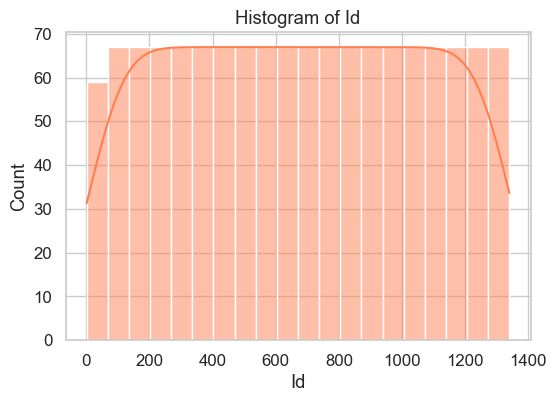

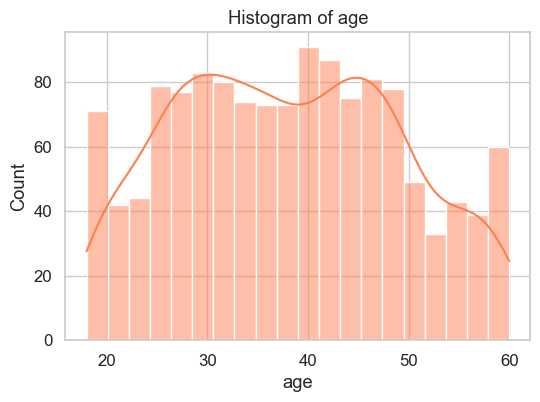

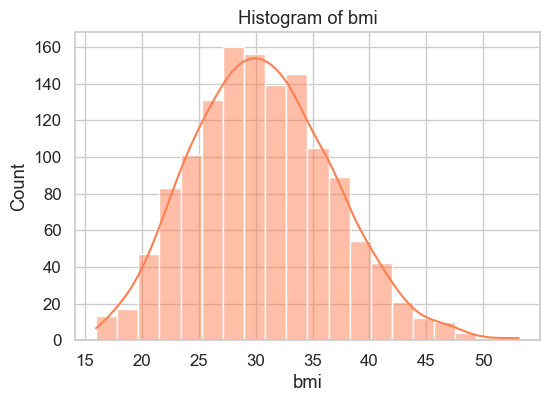

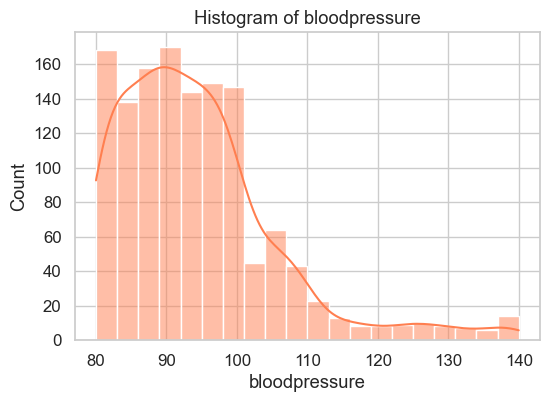

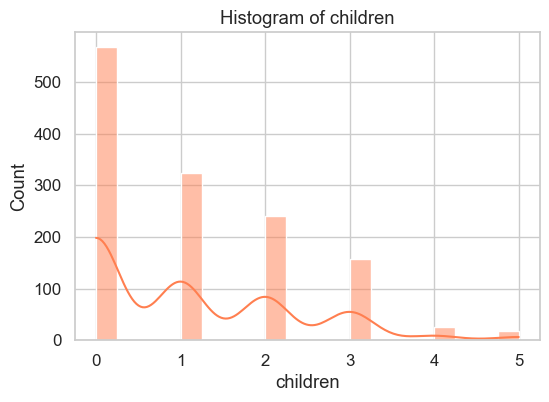

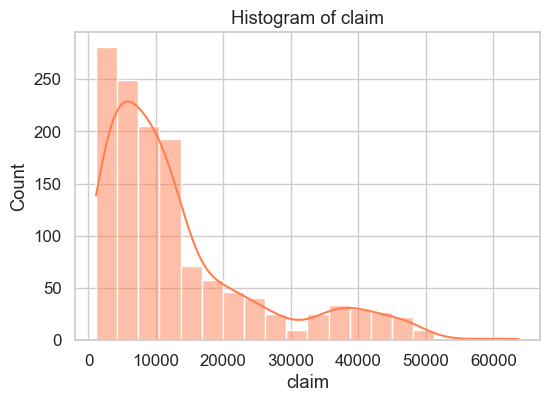

In [23]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True, color='coral')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

VISUALIZATION ON CATEGORICAL COLUMNS

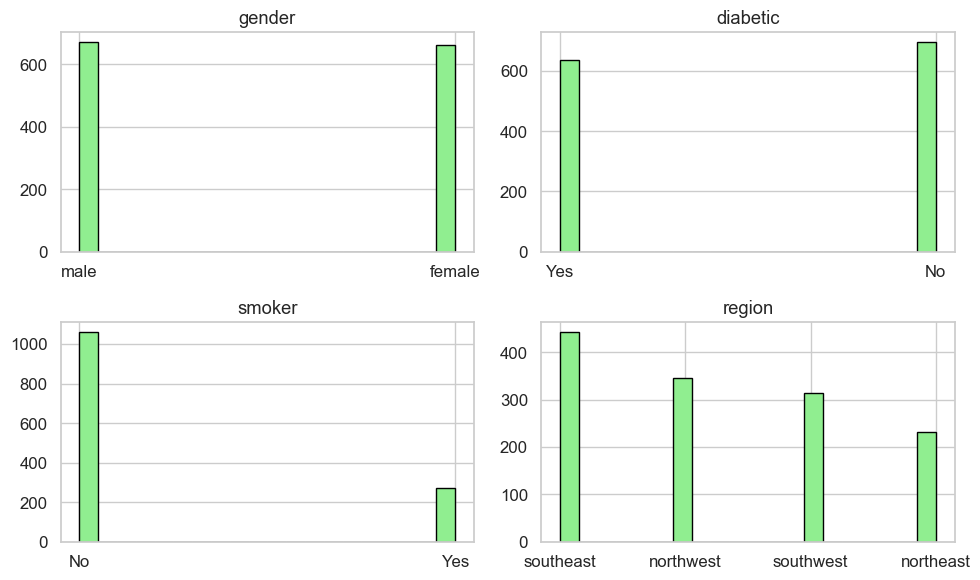

In [27]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, (len(categorical_cols) + 1) // 2, i)  # dynamic subplot layout
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(col)
    plt.tight_layout()
plt.show()

In [30]:
df.groupby(["gender","smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

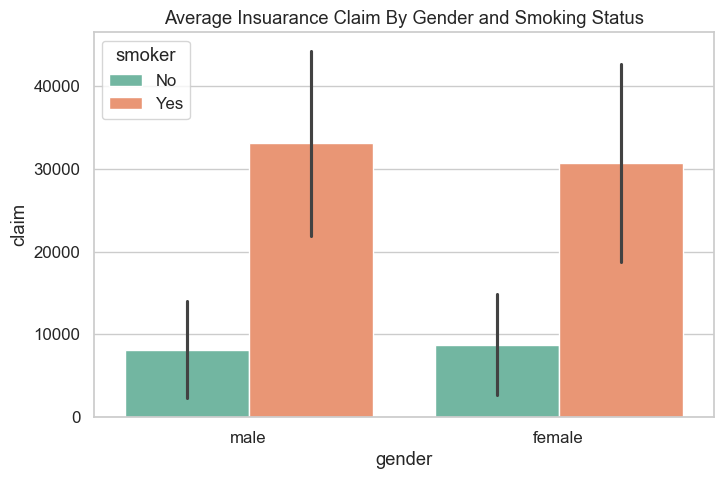

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="gender",y="claim",hue="smoker",estimator="mean",errorbar="sd")
plt.title("Average Insuarance Claim By Gender and Smoking Status")
plt.show()

In [32]:
pivot_region_diabetic=df.groupby(["region","diabetic"])["claim"].mean().unstack()

In [33]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


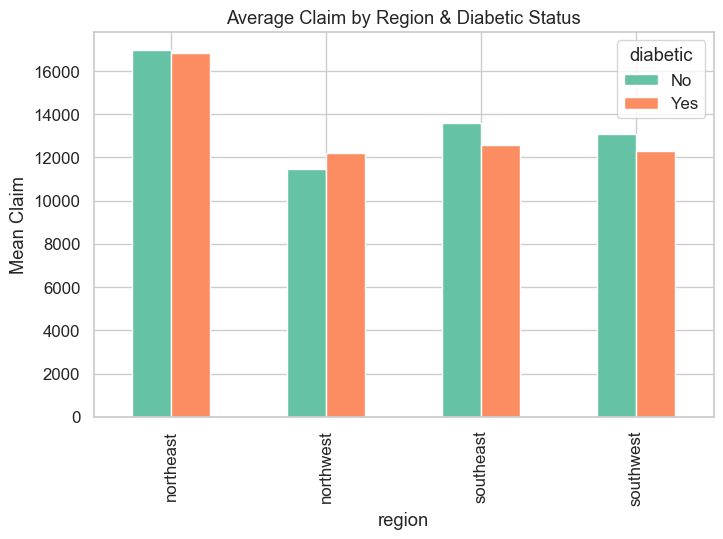

In [34]:
pivot_region_diabetic.plot(kind="bar",figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [35]:
pivot_table=pd.pivot_table(df,values="claim",index="region",columns="smoker",aggfunc="mean")

In [36]:
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [37]:
pivot_table=pd.pivot_table(df,values="claim",index="children",columns="diabetic",aggfunc="mean")

In [38]:
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59
